Modelling crime risk associated with Green Spaces
---
A case study of New York City using NYPD Complaint Data and Machine Learning models

| Authors                        | Student ID   |
|--------------------------------|--------------|
| Kaninik Baradi                 | 5216664      |
| Lala Sayyida Millati Nadhira   | 5844266      |
| Rezzy Yolanda Wulandhari       | 4779487      |
| Kelvin Engee                   | 4664043      |
| Philippe Almeida Mirault       | 5898803      |
Group 4

For the course: Responsible Data Analytics, SEN 163B
April 2023

# Introduction
This notebook is a companion to the report on Modelling Crime Risks associated with Green spaces. It contains all the code required to download, pre-process and analyse the data. The notebook is divided into the following sections:
- Preparation
- Descriptive Analytics
    - Preliminary Analysis
- Diagnostic Analytics
    - Feature Analysis
    - Feature Engineering
    - Bias Analysis
- Predictive Analysis
    - Target Variable Analysis
    - Train-Test Split Strategy
    - Model Evaluation
    - Model Interpretation
- Prescriptive Analysis
    - Cross Validation
    - Ensemble Predictor
    - Model Deployment

# Preparation

Dependencies:

Data Sources:

### Environment Setup

In [121]:
path_to_data = '..//data//' # path to the data folder

testing_mode = False # set to True to run the notebook in testing mode with reduced data imports


In [122]:
import pandas
import altair
import numpy
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import seaborn as sns

# Descriptive Analytics
This section contains the initial analysis of the selected data sets. It identifies the underlying relationships of the variables and if used to determine vriables of interest for further analysis.

## Complaints Data

In [123]:
# Create a function that selects every third number
def every_nth(n):
    return n % 10 == 0

if testing_mode:
    skipping = lambda i: i>0 and every_nth(i)
else:
    skipping = None

crime_data = pandas.read_csv("..\\NYPD_Complaint_Data_Historic.csv", skiprows=skipping)

C:\Users\Kaninik Baradi\AppData\Local\Temp\ipykernel_24496\814160522.py:10: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pandas.read_csv("..\\NYPD_Complaint_Data_Historic.csv", skiprows=skipping)


In [124]:
def make_categorical(dataframe, column):
    # make the column of the dataframe categorical
    dataframe[column] = dataframe[column].astype('category')

# get a lst of all the columns in the dataframe that need to be categorical

columns = ['ADDR_PCT_CD', 'BORO_NM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT', 'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD', 'PD_DESC', 'STATION_NAME', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_RACE', 'VIC_SEX']

    # make each column categorical
for column in columns:
    make_categorical(crime_data, column)

In [125]:
print(crime_data)

         CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM   
0         506547392   03/29/2018     20:30:00          NaN          NaN  \
1         629632833   02/06/2018     23:15:00          NaN          NaN   
2         787203902   11/21/2018     00:15:00   11/21/2018     00:20:00   
3         280364018   06/09/2018     21:42:00   06/09/2018     21:43:00   
4         985800320   11/10/2018     19:40:00   11/10/2018     19:45:00   
...             ...          ...          ...          ...          ...   
7825494   104527061   05/01/2008     18:55:00   05/01/2018     19:00:00   
7825495   284201488   05/18/2018     14:50:00   05/18/2018     14:55:00   
7825496   808565901   11/19/2018     02:25:00   11/19/2018     02:30:00   
7825497   649441648   02/03/2018     10:02:00   02/03/2018     12:15:00   
7825498   803166404   01/05/2018     14:40:00   01/05/2018     16:00:00   

        ADDR_PCT_CD      RPT_DT KY_CD                       OFNS_DESC  PD_CD   
0              32.0

In [126]:
#scrub for duplicate
crime_data.drop_duplicates(inplace=True)
print(crime_data)

         CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM   
0         506547392   03/29/2018     20:30:00          NaN          NaN  \
1         629632833   02/06/2018     23:15:00          NaN          NaN   
2         787203902   11/21/2018     00:15:00   11/21/2018     00:20:00   
3         280364018   06/09/2018     21:42:00   06/09/2018     21:43:00   
4         985800320   11/10/2018     19:40:00   11/10/2018     19:45:00   
...             ...          ...          ...          ...          ...   
7825494   104527061   05/01/2008     18:55:00   05/01/2018     19:00:00   
7825495   284201488   05/18/2018     14:50:00   05/18/2018     14:55:00   
7825496   808565901   11/19/2018     02:25:00   11/19/2018     02:30:00   
7825497   649441648   02/03/2018     10:02:00   02/03/2018     12:15:00   
7825498   803166404   01/05/2018     14:40:00   01/05/2018     16:00:00   

        ADDR_PCT_CD      RPT_DT KY_CD                       OFNS_DESC  PD_CD   
0              32.0

In [127]:
#scrub for irrelevant data (only use required columns)
crime_data = crime_data[['CMPLNT_FR_DT','CMPLNT_FR_TM','Longitude','Latitude','VIC_SEX','VIC_RACE','VIC_AGE_GROUP']]


In [128]:
crime_data

,CMPLNT_FR_DT,CMPLNT_FR_TM,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP
0,03/29/2018,20:30:00,-73.941064,40.810877,F,WHITE,25-44
1,02/06/2018,23:15:00,-73.908014,40.873671,D,UNKNOWN,UNKNOWN
2,11/21/2018,00:15:00,-73.885457,40.651782,D,UNKNOWN,UNKNOWN
3,06/09/2018,21:42:00,-73.994706,40.759310,F,WHITE HISPANIC,18-24
4,11/10/2018,19:40:00,-73.970728,40.764536,D,UNKNOWN,UNKNOWN
...,...,...,...,...,...,...,...
7825494,05/01/2008,18:55:00,-73.996540,40.756788,E,UNKNOWN,UNKNOWN
7825495,05/18/2018,14:50:00,-74.102317,40.577953,M,WHITE HISPANIC,<18
7825496,11/19/2018,02:25:00,-73.862427,40.743188,M,ASIAN / PACIFIC ISLANDER,25-44
7825497,02/03/2018,10:02:00,-74.089000,40.593665,M,WHITE,45-64


In [129]:
#unlike usual, all the rows with missing data is deleted beforehand, because there all the data is missing completely at random
missing_counts = crime_data.isna().sum()

print(missing_counts)

CMPLNT_FR_DT         655
CMPLNT_FR_TM          48
Longitude          17339
Latitude           17339
VIC_SEX              308
VIC_RACE             390
VIC_AGE_GROUP    1638445
dtype: int64


In [130]:
crime_data = crime_data.dropna(axis=0)

print(crime_data)

        CMPLNT_FR_DT CMPLNT_FR_TM  Longitude   Latitude VIC_SEX   
0         03/29/2018     20:30:00 -73.941064  40.810877       F  \
1         02/06/2018     23:15:00 -73.908014  40.873671       D   
2         11/21/2018     00:15:00 -73.885457  40.651782       D   
3         06/09/2018     21:42:00 -73.994706  40.759310       F   
4         11/10/2018     19:40:00 -73.970728  40.764536       D   
...              ...          ...        ...        ...     ...   
7825494   05/01/2008     18:55:00 -73.996540  40.756788       E   
7825495   05/18/2018     14:50:00 -74.102317  40.577953       M   
7825496   11/19/2018     02:25:00 -73.862427  40.743188       M   
7825497   02/03/2018     10:02:00 -74.089000  40.593665       M   
7825498   01/05/2018     14:40:00 -73.944529  40.688872       F   

                         VIC_RACE VIC_AGE_GROUP  
0                           WHITE         25-44  
1                         UNKNOWN       UNKNOWN  
2                         UNKNOWN       UNKNO

In [131]:
#unlike usual, all the rows with missing data is deleted beforehand, because there all the data is missing completely at random
missing_counts = crime_data.isna().sum()

print(missing_counts)

CMPLNT_FR_DT     0
CMPLNT_FR_TM     0
Longitude        0
Latitude         0
VIC_SEX          0
VIC_RACE         0
VIC_AGE_GROUP    0
dtype: int64


# CMPLNT_FR_DT


In [132]:
crime_data[['month','day','year']] = crime_data['CMPLNT_FR_DT'].str.split('/',expand=True).astype(int)

C:\Users\Kaninik Baradi\AppData\Local\Temp\ipykernel_24496\3669391758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data[['month','day','year']] = crime_data['CMPLNT_FR_DT'].str.split('/',expand=True).astype(int)
C:\Users\Kaninik Baradi\AppData\Local\Temp\ipykernel_24496\3669391758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data[['month','day','year']] = crime_data['CMPLNT_FR_DT'].str.split('/',expand=True).astype(int)
C:\Users\Kaninik Baradi\AppData\Local\Temp\ipykernel_24496\366

In [133]:
crime_data

,CMPLNT_FR_DT,CMPLNT_FR_TM,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP,month,day,year
0,03/29/2018,20:30:00,-73.941064,40.810877,F,WHITE,25-44,3,29,2018
1,02/06/2018,23:15:00,-73.908014,40.873671,D,UNKNOWN,UNKNOWN,2,6,2018
2,11/21/2018,00:15:00,-73.885457,40.651782,D,UNKNOWN,UNKNOWN,11,21,2018
3,06/09/2018,21:42:00,-73.994706,40.759310,F,WHITE HISPANIC,18-24,6,9,2018
4,11/10/2018,19:40:00,-73.970728,40.764536,D,UNKNOWN,UNKNOWN,11,10,2018
...,...,...,...,...,...,...,...,...,...,...
7825494,05/01/2008,18:55:00,-73.996540,40.756788,E,UNKNOWN,UNKNOWN,5,1,2008
7825495,05/18/2018,14:50:00,-74.102317,40.577953,M,WHITE HISPANIC,<18,5,18,2018
7825496,11/19/2018,02:25:00,-73.862427,40.743188,M,ASIAN / PACIFIC ISLANDER,25-44,11,19,2018
7825497,02/03/2018,10:02:00,-74.089000,40.593665,M,WHITE,45-64,2,3,2018


In [134]:
crime_data = crime_data.loc[crime_data['year'] >= 2006]

In [135]:
crime_data['CMPLNT_FR_DT'] = pandas.to_datetime(crime_data['CMPLNT_FR_DT'], format='%m/%d/%Y')
crime_data['day_of_week'] = crime_data['CMPLNT_FR_DT'].dt.dayofweek

C:\Users\Kaninik Baradi\AppData\Local\Temp\ipykernel_24496\2150539645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['CMPLNT_FR_DT'] = pandas.to_datetime(crime_data['CMPLNT_FR_DT'], format='%m/%d/%Y')
C:\Users\Kaninik Baradi\AppData\Local\Temp\ipykernel_24496\2150539645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['day_of_week'] = crime_data['CMPLNT_FR_DT'].dt.dayofweek


In [136]:
crime_data = crime_data.drop('CMPLNT_FR_DT', axis=1)
crime_data = crime_data.drop('month', axis=1)
crime_data = crime_data.drop('day', axis=1)
crime_data

,CMPLNT_FR_TM,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP,year,day_of_week
0,20:30:00,-73.941064,40.810877,F,WHITE,25-44,2018,3
1,23:15:00,-73.908014,40.873671,D,UNKNOWN,UNKNOWN,2018,1
2,00:15:00,-73.885457,40.651782,D,UNKNOWN,UNKNOWN,2018,2
3,21:42:00,-73.994706,40.759310,F,WHITE HISPANIC,18-24,2018,5
4,19:40:00,-73.970728,40.764536,D,UNKNOWN,UNKNOWN,2018,5
...,...,...,...,...,...,...,...,...
7825494,18:55:00,-73.996540,40.756788,E,UNKNOWN,UNKNOWN,2008,3
7825495,14:50:00,-74.102317,40.577953,M,WHITE HISPANIC,<18,2018,4
7825496,02:25:00,-73.862427,40.743188,M,ASIAN / PACIFIC ISLANDER,25-44,2018,0
7825497,10:02:00,-74.089000,40.593665,M,WHITE,45-64,2018,5


# CMPLNT_FR_TM

In [137]:
crime_data[['hour','minute','second']] = crime_data['CMPLNT_FR_TM'].str.split(':',expand=True).astype(int)

In [138]:
crime_data = crime_data.drop('CMPLNT_FR_TM', axis=1)
crime_data = crime_data.drop('second', axis=1)
crime_data = crime_data.drop('minute', axis=1)
crime_data

,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP,year,day_of_week,hour
0,-73.941064,40.810877,F,WHITE,25-44,2018,3,20
1,-73.908014,40.873671,D,UNKNOWN,UNKNOWN,2018,1,23
2,-73.885457,40.651782,D,UNKNOWN,UNKNOWN,2018,2,0
3,-73.994706,40.759310,F,WHITE HISPANIC,18-24,2018,5,21
4,-73.970728,40.764536,D,UNKNOWN,UNKNOWN,2018,5,19
...,...,...,...,...,...,...,...,...
7825494,-73.996540,40.756788,E,UNKNOWN,UNKNOWN,2008,3,18
7825495,-74.102317,40.577953,M,WHITE HISPANIC,<18,2018,4,14
7825496,-73.862427,40.743188,M,ASIAN / PACIFIC ISLANDER,25-44,2018,0,2
7825497,-74.089000,40.593665,M,WHITE,45-64,2018,5,10


# Grid the Longitude and Latitude

In [139]:
# Create a grid of points across the precincts to use as the center of the crime clusters
# The size of the grid is n x n, where n is the number of points in each direction
from shapely.geometry import Point, Polygon
from rtree import index

precint_footprint = gpd.read_file('..//data//Police Precincts.geojson')

# get the bounds of the precincts
min_x, min_y, max_x, max_y = precint_footprint.total_bounds

idx = index.Index()
for i, row in precint_footprint.iterrows():
    idx.insert(i, row.geometry.bounds)

grid_size = 100  # You can adjust this value
x_points = np.linspace(min_x, max_x, grid_size)
y_points = np.linspace(min_y, max_y, grid_size)

# Round the points to 4 decimal places
x_points = np.around(x_points, 5)
y_points = np.around(y_points, 5)

grid = [Point(x, y) for x in x_points for y in y_points]

# drop the points that are not within the precincts
def is_point_inside_precincts(point, precincts_gdf, idx):
    for i in idx.intersection(point.bounds):
        if point.within(precincts_gdf.iloc[i].geometry):
            return True
    return False

filtered_grid = [point for point in grid if is_point_inside_precincts(point, precint_footprint, idx)]
filtered_grid_df = pandas.DataFrame([(point.x, point.y) for point in filtered_grid], columns=['Longitude', 'Latitude'])
#
del grid
del filtered_grid

In [140]:
from scipy.spatial import cKDTree

# create a KD Tree with the Longitude and Latitude columns of filtered_grid_df
kd_tree = cKDTree(filtered_grid_df[['Longitude', 'Latitude']])

def nearest_grid_point(coord, grid_points):
    nearest_index = np.argmin(np.abs(coord - grid_points))
    return grid_points[nearest_index]

In [141]:

# query the KD Tree with the Longitude and Latitude columns of crime_data
distances, indices = kd_tree.query(crime_data[['Longitude', 'Latitude']])

# use the indices to get the corresponding Longitude and Latitude values from filtered_grid_df
crime_data['Longitude'] = filtered_grid_df.loc[indices, 'Longitude'].values
crime_data['Latitude'] = filtered_grid_df.loc[indices, 'Latitude'].values

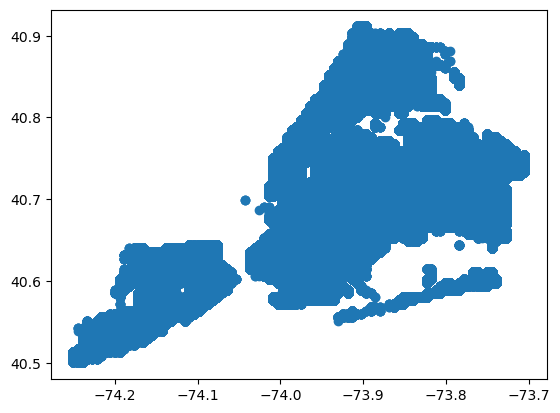

In [142]:
plt.scatter(crime_data['Longitude'], crime_data['Latitude'])

In [143]:
crime_data = crime_data.loc[crime_data['Longitude'] > -74.5]

In [144]:
crime_data = crime_data.loc[crime_data['Latitude'] < 42.5]

In [145]:
crime_data

,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP,year,day_of_week,hour
0,-73.94132,40.80962,F,WHITE,25-44,2018,3,20
1,-73.90765,40.87317,D,UNKNOWN,UNKNOWN,2018,1,23
2,-73.88520,40.65288,D,UNKNOWN,UNKNOWN,2018,2,0
3,-73.99744,40.75879,F,WHITE HISPANIC,18-24,2018,5,21
4,-73.96938,40.76302,D,UNKNOWN,UNKNOWN,2018,5,19
...,...,...,...,...,...,...,...,...
7825494,-73.99744,40.75879,E,UNKNOWN,UNKNOWN,2008,3,18
7825495,-74.10407,40.57662,M,WHITE HISPANIC,<18,2018,4,14
7825496,-73.86276,40.74184,M,ASIAN / PACIFIC ISLANDER,25-44,2018,0,2
7825497,-74.08723,40.59357,M,WHITE,45-64,2018,5,10


# VIC_SEX

In [146]:
crime_data['VIC_SEX'].unique()

['F', 'D', 'E', 'M', 'U']
Categories (5, object): ['D', 'E', 'F', 'M', 'U']

In [147]:
# Only keep the M and F sex values
sexes = ['M', 'F']

crime_data = crime_data.loc[crime_data['VIC_SEX'].isin(sexes)]
# Re calculate the categories for the Sex column
crime_data['VIC_SEX'] = crime_data['VIC_SEX'].cat.remove_unused_categories()

del sexes
crime_data.head(5)

C:\Users\Kaninik Baradi\AppData\Local\Temp\ipykernel_24496\451495837.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['VIC_SEX'] = crime_data['VIC_SEX'].cat.remove_unused_categories()


,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP,year,day_of_week,hour
0,-73.94132,40.80962,F,WHITE,25-44,2018,3,20
3,-73.99744,40.75879,F,WHITE HISPANIC,18-24,2018,5,21
8,-73.91326,40.63593,M,BLACK,<18,2018,1,14
9,-73.91887,40.82657,F,WHITE HISPANIC,25-44,2018,5,22
10,-73.95255,40.80539,M,BLACK,25-44,2018,2,18


In [148]:
crime_data['VIC_SEX'].unique()

['F', 'M']
Categories (2, object): ['F', 'M']

# VIC_RACE


In [149]:
crime_data['VIC_RACE'].unique()

['WHITE', 'WHITE HISPANIC', 'BLACK', 'ASIAN / PACIFIC ISLANDER', 'BLACK HISPANIC', 'UNKNOWN', 'AMERICAN INDIAN/ALASKAN NATIVE', 'OTHER']
Categories (8, object): ['AMERICAN INDIAN/ALASKAN NATIVE', 'ASIAN / PACIFIC ISLANDER', 'BLACK', 'BLACK HISPANIC', 'OTHER', 'UNKNOWN', 'WHITE', 'WHITE HISPANIC']

In [150]:
# Keep everything except for UNKNOWN and OTHER
races = ['WHITE', 'WHITE HISPANIC', 'BLACK','ASIAN / PACIFIC ISLANDER', 'BLACK HISPANIC','AMERICAN INDIAN/ALASKAN NATIVE', 'OTHER']

crime_data = crime_data.loc[crime_data['VIC_RACE'].isin(races)]
# Re calculate the categories for the Sex column
crime_data['VIC_RACE'] = crime_data['VIC_RACE'].cat.remove_unused_categories()

del races
crime_data.head(5)

,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP,year,day_of_week,hour
0,-73.94132,40.80962,F,WHITE,25-44,2018,3,20
3,-73.99744,40.75879,F,WHITE HISPANIC,18-24,2018,5,21
8,-73.91326,40.63593,M,BLACK,<18,2018,1,14
9,-73.91887,40.82657,F,WHITE HISPANIC,25-44,2018,5,22
10,-73.95255,40.80539,M,BLACK,25-44,2018,2,18


In [151]:
crime_data['VIC_RACE'].unique()

['WHITE', 'WHITE HISPANIC', 'BLACK', 'ASIAN / PACIFIC ISLANDER', 'BLACK HISPANIC', 'AMERICAN INDIAN/ALASKAN NATIVE', 'OTHER']
Categories (7, object): ['AMERICAN INDIAN/ALASKAN NATIVE', 'ASIAN / PACIFIC ISLANDER', 'BLACK', 'BLACK HISPANIC', 'OTHER', 'WHITE', 'WHITE HISPANIC']

# VIC_AGE_GROUP

In [152]:
crime_data['VIC_AGE_GROUP'].unique()

array(['25-44', '18-24', '<18', '45-64', '65+', 'UNKNOWN', '-942', '970',
       '1017', '-51', '954', '972', '951', '-55', '-1', '-966', '-59',
       '-974', '-948', '956', '-962', '-2', '-936', '-81', '-40', '-37',
       '-973', '-5', '-957', '154', '-952', '-940', '-968', '-943',
       '-929', '-43', '-56', '-954', '943', '-961', '-967', '1018', '929',
       '936', '-71', '-50', '-69', '-67', '937', '-946', '941', '1013',
       '-39', '960', '927', '938', '-984', '-978', '-970', '950', '-934',
       '-4', '-62', '-3', '-960', '-921', '-61', '-48', '963', '945',
       '-935', '-975', '-980', '-72', '946', '-959', '1014', '-931',
       '-972', '949', '-965', '-60', '1016', '932', '-31', '-963', '930',
       '-7', '-73', '-938', '-937', '-53', '-45', '-902', '-63', '-70',
       '-981', '928', '-964', '-950', '-971', '-945', '940', '-36', '-52',
       '-32', '922', '914', '926', '-78', '947', '810', '980', '942',
       '-923', '711', '924', '-982', '933', '309', '152', '962'

In [153]:
#remove values that don't belong to a victim age group
crime_data['VIC_AGE_GROUP'] = numpy.where(crime_data['VIC_AGE_GROUP'].str.len()==4, None, crime_data['VIC_AGE_GROUP'])
crime_data['VIC_AGE_GROUP'] = numpy.where(crime_data['VIC_AGE_GROUP'].str.startswith("-"), None, crime_data['VIC_AGE_GROUP'])
crime_data['VIC_AGE_GROUP'] = numpy.where(crime_data['VIC_AGE_GROUP'].str.contains("<"), crime_data['VIC_AGE_GROUP'] + ' ', crime_data['VIC_AGE_GROUP'])
crime_data['VIC_AGE_GROUP'] = numpy.where(crime_data['VIC_AGE_GROUP'].str.endswith("+"), crime_data['VIC_AGE_GROUP'] + ' ', crime_data['VIC_AGE_GROUP'])
crime_data['VIC_AGE_GROUP'] = numpy.where(crime_data['VIC_AGE_GROUP'].str.contains("UNKNOWN"), None, crime_data['VIC_AGE_GROUP'])
crime_data['VIC_AGE_GROUP'] = numpy.where(crime_data['VIC_AGE_GROUP'].str.len()==3, None, crime_data['VIC_AGE_GROUP'])

In [154]:
crime_data.head(5)

,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP,year,day_of_week,hour
0,-73.94132,40.80962,F,WHITE,25-44,2018,3,20
3,-73.99744,40.75879,F,WHITE HISPANIC,18-24,2018,5,21
8,-73.91326,40.63593,M,BLACK,<18,2018,1,14
9,-73.91887,40.82657,F,WHITE HISPANIC,25-44,2018,5,22
10,-73.95255,40.80539,M,BLACK,25-44,2018,2,18


In [155]:
#delete None
crime_data = crime_data.dropna(subset=['VIC_AGE_GROUP'])

In [156]:
crime_data['VIC_AGE_GROUP'].unique()

array(['25-44', '18-24', '<18 ', '45-64', '65+ '], dtype=object)

In [157]:
crime_data.head(5)

,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP,year,day_of_week,hour
0,-73.94132,40.80962,F,WHITE,25-44,2018,3,20
3,-73.99744,40.75879,F,WHITE HISPANIC,18-24,2018,5,21
8,-73.91326,40.63593,M,BLACK,<18,2018,1,14
9,-73.91887,40.82657,F,WHITE HISPANIC,25-44,2018,5,22
10,-73.95255,40.80539,M,BLACK,25-44,2018,2,18


# One hot encoding

In [158]:
one_hot_encoded = pandas.get_dummies(crime_data[['VIC_SEX','VIC_RACE','VIC_AGE_GROUP']])
one_hot_encoded

,VIC_SEX_F,VIC_SEX_M,VIC_RACE_AMERICAN INDIAN/ALASKAN NATIVE,VIC_RACE_ASIAN / PACIFIC ISLANDER,VIC_RACE_BLACK,VIC_RACE_BLACK HISPANIC,VIC_RACE_OTHER,VIC_RACE_WHITE,VIC_RACE_WHITE HISPANIC,VIC_AGE_GROUP_18-24,VIC_AGE_GROUP_25-44,VIC_AGE_GROUP_45-64,VIC_AGE_GROUP_65+,VIC_AGE_GROUP_<18
0,True,False,False,False,False,False,False,True,False,False,True,False,False,False
3,True,False,False,False,False,False,False,False,True,True,False,False,False,False
8,False,True,False,False,True,False,False,False,False,False,False,False,False,True
9,True,False,False,False,False,False,False,False,True,False,True,False,False,False
10,False,True,False,False,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825493,False,True,False,False,False,False,False,False,True,False,False,True,False,False
7825495,False,True,False,False,False,False,False,False,True,False,False,False,False,True
7825496,False,True,False,True,False,False,False,False,False,False,True,False,False,False
7825497,False,True,False,False,False,False,False,True,False,False,False,True,False,False


In [159]:
one_hot_encoded_df = crime_data

# concatenate the one-hot encoded columns with the original dataframe
one_hot_encoded_df = pandas.concat([one_hot_encoded_df, one_hot_encoded], axis=1)


In [160]:
one_hot_encoded_df

,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP,year,day_of_week,hour,VIC_SEX_F,VIC_SEX_M,...,VIC_RACE_BLACK,VIC_RACE_BLACK HISPANIC,VIC_RACE_OTHER,VIC_RACE_WHITE,VIC_RACE_WHITE HISPANIC,VIC_AGE_GROUP_18-24,VIC_AGE_GROUP_25-44,VIC_AGE_GROUP_45-64,VIC_AGE_GROUP_65+,VIC_AGE_GROUP_<18
0,-73.94132,40.80962,F,WHITE,25-44,2018,3,20,True,False,...,False,False,False,True,False,False,True,False,False,False
3,-73.99744,40.75879,F,WHITE HISPANIC,18-24,2018,5,21,True,False,...,False,False,False,False,True,True,False,False,False,False
8,-73.91326,40.63593,M,BLACK,<18,2018,1,14,False,True,...,True,False,False,False,False,False,False,False,False,True
9,-73.91887,40.82657,F,WHITE HISPANIC,25-44,2018,5,22,True,False,...,False,False,False,False,True,False,True,False,False,False
10,-73.95255,40.80539,M,BLACK,25-44,2018,2,18,False,True,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825493,-73.90765,40.85622,M,WHITE HISPANIC,45-64,2018,1,15,False,True,...,False,False,False,False,True,False,False,True,False,False
7825495,-74.10407,40.57662,M,WHITE HISPANIC,<18,2018,4,14,False,True,...,False,False,False,False,True,False,False,False,False,True
7825496,-73.86276,40.74184,M,ASIAN / PACIFIC ISLANDER,25-44,2018,0,2,False,True,...,False,False,False,False,False,False,True,False,False,False
7825497,-74.08723,40.59357,M,WHITE,45-64,2018,5,10,False,True,...,False,False,False,True,False,False,False,True,False,False


In [161]:
# drop the VIC_SEX, VIC_Race, and VIC_AGE_GROUP columns
one_hot_encoded_df = one_hot_encoded_df.drop('VIC_SEX', axis=1)
one_hot_encoded_df = one_hot_encoded_df.drop('VIC_RACE', axis=1)
one_hot_encoded_df = one_hot_encoded_df.drop('VIC_AGE_GROUP', axis=1)

In [162]:
crime_counts = (
    one_hot_encoded_df.groupby(['Longitude', 'Latitude', 'year', 'day_of_week', 'hour'])
    .sum()
)


In [163]:
crime_counts.reset_index(inplace=True)

In [164]:
del one_hot_encoded_df
del crime_data

# Trees

In [165]:
if testing_mode:
    rows = 20000
else:
    rows = None

trees = gpd.read_file('../data/2015 Street Tree Census - Tree Data.geojson', rows=rows)
# trees = trees.to_crs(epsg=4326)
trees

,nta,health,zipcode,latitude,nta_name,state,trnk_wire,y_sp,brnch_othe,root_grate,...,address,sidewalk,root_other,created_at,borocode,block_id,trnk_light,tree_dbh,root_stone,geometry
0,QN17,Fair,11375,40.72309177,Forest Hills,New York,No,202756.768749,No,No,...,108-005 70 AVENUE,NoDamage,No,08/27/2015,4,348711,No,3,No,POINT (-73.84422 40.72309)
1,QN49,Fair,11357,40.79411067,Whitestone,New York,No,228644.837379,No,No,...,147-074 7 AVENUE,Damage,No,09/03/2015,4,315986,No,21,Yes,POINT (-73.81868 40.79411)
2,BK90,Good,11211,40.71758074,East Williamsburg,New York,No,200716.891267,No,No,...,390 MORGAN AVENUE,Damage,No,09/05/2015,3,218365,No,3,No,POINT (-73.93661 40.71758)
3,BK90,Good,11211,40.71353749,East Williamsburg,New York,No,199244.253136,No,No,...,1027 GRAND STREET,Damage,No,09/05/2015,3,217969,No,10,Yes,POINT (-73.93446 40.71354)
4,BK37,Good,11215,40.66677776,Park Slope-Gowanus,New York,No,182202.425999,No,No,...,603 6 STREET,Damage,No,08/30/2015,3,223043,No,21,Yes,POINT (-73.97598 40.66678)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,BK73,Good,11211,40.71321078,North Side-South Side,New York,No,199121.636255,No,No,...,32 MARCY AVENUE,Damage,No,08/18/2015,3,217978,No,25,No,POINT (-73.95494 40.71321)
683784,QN17,Good,11375,40.71519444,Forest Hills,New York,No,199873.647547,No,No,...,67-035 SELFRIDGE STREET,NoDamage,No,08/29/2015,4,348185,No,7,No,POINT (-73.85665 40.71519)
683785,SI07,Good,10314,40.62076153,Westerleigh,New York,No,165466.07627,No,No,...,130 BIDWELL AVENUE,Damage,No,08/22/2015,5,401670,No,12,No,POINT (-74.13652 40.62076)
683786,BX41,Good,10457,40.85082819,Mount Hope,New York,No,249271.950653,No,No,...,1985 ANTHONY AVENUE,NoDamage,No,08/29/2015,2,504204,No,9,No,POINT (-73.90311 40.85083)


In [166]:
# drop the columns that we don't need
trees = trees[['health', 'longitude', 'latitude']]


In [167]:

# query the KD Tree with the Longitude and Latitude columns of crime_data
distances, indices = kd_tree.query(trees[['longitude', 'latitude']])

# use the indices to get the corresponding Longitude and Latitude values from filtered_grid_df
trees['Longitude'] = filtered_grid_df.loc[indices, 'Longitude'].values
trees['Latitude'] = filtered_grid_df.loc[indices, 'Latitude'].values

tree_counts = (
    trees.groupby(['Longitude', 'Latitude','health'])
    .size()
    .reset_index(name='tree_count')
)


C:\Users\Kaninik Baradi\AppData\Local\Temp\ipykernel_24496\3889633532.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trees['Longitude'] = filtered_grid_df.loc[indices, 'Longitude'].values
C:\Users\Kaninik Baradi\AppData\Local\Temp\ipykernel_24496\3889633532.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trees['Latitude'] = filtered_grid_df.loc[indices, 'Latitude'].values


In [168]:
tree_counts.head()

tree_counts_pivoted = pandas.pivot_table(tree_counts, values='tree_count', index=['Longitude', 'Latitude'], columns=['health'], fill_value=0)
tree_counts_pivoted = tree_counts_pivoted.reset_index().rename(columns={'Good': 'good_tree_count', 'Fair': 'fair_tree_count', 'Poor': 'poor_tree_count'})

# Remove index name
tree_counts_pivoted.index.name = None

In [169]:
tree_counts_pivoted

health,Longitude,Latitude,fair_tree_count,good_tree_count,poor_tree_count
0,-74.24998,40.50037,21,155,0
1,-74.24998,40.50461,58,687,17
2,-74.24998,40.50884,30,415,7
3,-74.24998,40.51308,4,98,7
4,-74.24437,40.50037,65,351,23
...,...,...,...,...,...
3020,-73.70562,40.73761,37,521,4
3021,-73.70562,40.74184,29,645,8
3022,-73.70562,40.74608,110,547,16
3023,-73.70562,40.75032,57,464,30


# Feature Creation

In [170]:
import itertools

def point_hour_day_combinations(points, hours, days_of_week, years):
    for point, hour, day, year in itertools.product(points, hours, days_of_week, years):
        yield point.x, point.y, hour, day, year

# Convert filtered grid points to a list of Point objects
points = [Point(lon, lat) for lon, lat in filtered_grid_df[['Longitude', 'Latitude']].values]

# Define hours and days_of_week
hours = range(24)
days_of_week = range(7)
years = range(2006, 2021)

In [171]:
all_combinations = np.array(list(point_hour_day_combinations(points, hours, days_of_week, years)))

# Reduce points for testing

In [172]:
if testing_mode:
    #REDUCE POINTS FOR TESTING
    # use numpy to drop all points that are left of the longitude of the mid point of the grid
    all_combinations = all_combinations[all_combinations[:, 0] > filtered_grid_df['Longitude'].median()]
    # use numpy to drop all points that are above the latitude of the mid point of the grid
    all_combinations = all_combinations[all_combinations[:, 1] < filtered_grid_df['Latitude'].median()]

In [173]:
crime_counts.set_index(['Longitude', 'Latitude', 'hour', 'day_of_week', 'year'], inplace=True)

In [174]:
matched_data = crime_counts.reindex(
    pandas.MultiIndex.from_arrays(all_combinations.T, names=crime_counts.index.names),
    fill_value=0
)
matched_data.reset_index(inplace=True)

matched_data = matched_data.merge(tree_counts_pivoted, on=['Longitude', 'Latitude'], how='left').fillna(0)

In [175]:
matched_data

,Longitude,Latitude,hour,day_of_week,year,VIC_SEX_F,VIC_SEX_M,VIC_RACE_AMERICAN INDIAN/ALASKAN NATIVE,VIC_RACE_ASIAN / PACIFIC ISLANDER,VIC_RACE_BLACK,...,VIC_RACE_WHITE,VIC_RACE_WHITE HISPANIC,VIC_AGE_GROUP_18-24,VIC_AGE_GROUP_25-44,VIC_AGE_GROUP_45-64,VIC_AGE_GROUP_65+,VIC_AGE_GROUP_<18,fair_tree_count,good_tree_count,poor_tree_count
0,-74.24998,40.50037,0.0,0.0,2006.0,0,0,0,0,0,...,0,0,0,0,0,0,0,21.0,155.0,0.0
1,-74.24998,40.50037,0.0,0.0,2007.0,0,0,0,0,0,...,0,0,0,0,0,0,0,21.0,155.0,0.0
2,-74.24998,40.50037,0.0,0.0,2008.0,0,0,0,0,0,...,0,0,0,0,0,0,0,21.0,155.0,0.0
3,-74.24998,40.50037,0.0,0.0,2009.0,0,0,0,0,0,...,0,0,0,0,0,0,0,21.0,155.0,0.0
4,-74.24998,40.50037,0.0,0.0,2010.0,0,0,0,0,0,...,0,0,0,0,0,0,0,21.0,155.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8837635,-73.70562,40.75455,23.0,6.0,2016.0,1,0,0,0,1,...,0,0,0,1,0,0,0,24.0,59.0,12.0
8837636,-73.70562,40.75455,23.0,6.0,2017.0,0,0,0,0,0,...,0,0,0,0,0,0,0,24.0,59.0,12.0
8837637,-73.70562,40.75455,23.0,6.0,2018.0,0,0,0,0,0,...,0,0,0,0,0,0,0,24.0,59.0,12.0
8837638,-73.70562,40.75455,23.0,6.0,2019.0,0,0,0,0,0,...,0,0,0,0,0,0,0,24.0,59.0,12.0


In [176]:
# define risk count as the sum of all columns that start with 'VIC'
matched_data['crime_count'] = matched_data.filter(regex='VIC').sum(axis=1)

In [177]:
matched_data

,Longitude,Latitude,hour,day_of_week,year,VIC_SEX_F,VIC_SEX_M,VIC_RACE_AMERICAN INDIAN/ALASKAN NATIVE,VIC_RACE_ASIAN / PACIFIC ISLANDER,VIC_RACE_BLACK,...,VIC_RACE_WHITE HISPANIC,VIC_AGE_GROUP_18-24,VIC_AGE_GROUP_25-44,VIC_AGE_GROUP_45-64,VIC_AGE_GROUP_65+,VIC_AGE_GROUP_<18,fair_tree_count,good_tree_count,poor_tree_count,crime_count
0,-74.24998,40.50037,0.0,0.0,2006.0,0,0,0,0,0,...,0,0,0,0,0,0,21.0,155.0,0.0,0
1,-74.24998,40.50037,0.0,0.0,2007.0,0,0,0,0,0,...,0,0,0,0,0,0,21.0,155.0,0.0,0
2,-74.24998,40.50037,0.0,0.0,2008.0,0,0,0,0,0,...,0,0,0,0,0,0,21.0,155.0,0.0,0
3,-74.24998,40.50037,0.0,0.0,2009.0,0,0,0,0,0,...,0,0,0,0,0,0,21.0,155.0,0.0,0
4,-74.24998,40.50037,0.0,0.0,2010.0,0,0,0,0,0,...,0,0,0,0,0,0,21.0,155.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8837635,-73.70562,40.75455,23.0,6.0,2016.0,1,0,0,0,1,...,0,0,1,0,0,0,24.0,59.0,12.0,3
8837636,-73.70562,40.75455,23.0,6.0,2017.0,0,0,0,0,0,...,0,0,0,0,0,0,24.0,59.0,12.0,0
8837637,-73.70562,40.75455,23.0,6.0,2018.0,0,0,0,0,0,...,0,0,0,0,0,0,24.0,59.0,12.0,0
8837638,-73.70562,40.75455,23.0,6.0,2019.0,0,0,0,0,0,...,0,0,0,0,0,0,24.0,59.0,12.0,0


In [178]:
# Create columns in matched_data called Risk_level
# if the sum of the crime counts is 0 then risk level is 0, if it is greater than 0 and less than 4 then risk level is 1, if it is greater than 3 then risk level is 2 and if it is greater than 6 then risk level is 3
def risk_level(crime_count):
    if crime_count == 0:
        return 0
    elif 0 < crime_count < 4:
        return 1
    elif 3 < crime_count < 7:
        return 2
    else:
        return 3

matched_data['Risk_level'] = matched_data['crime_count'].apply(risk_level)

In [179]:
# export matched_data to a parquet file
matched_data.to_parquet('..\\data\\matched_data.parquet')

# LAB 4

## Proxies

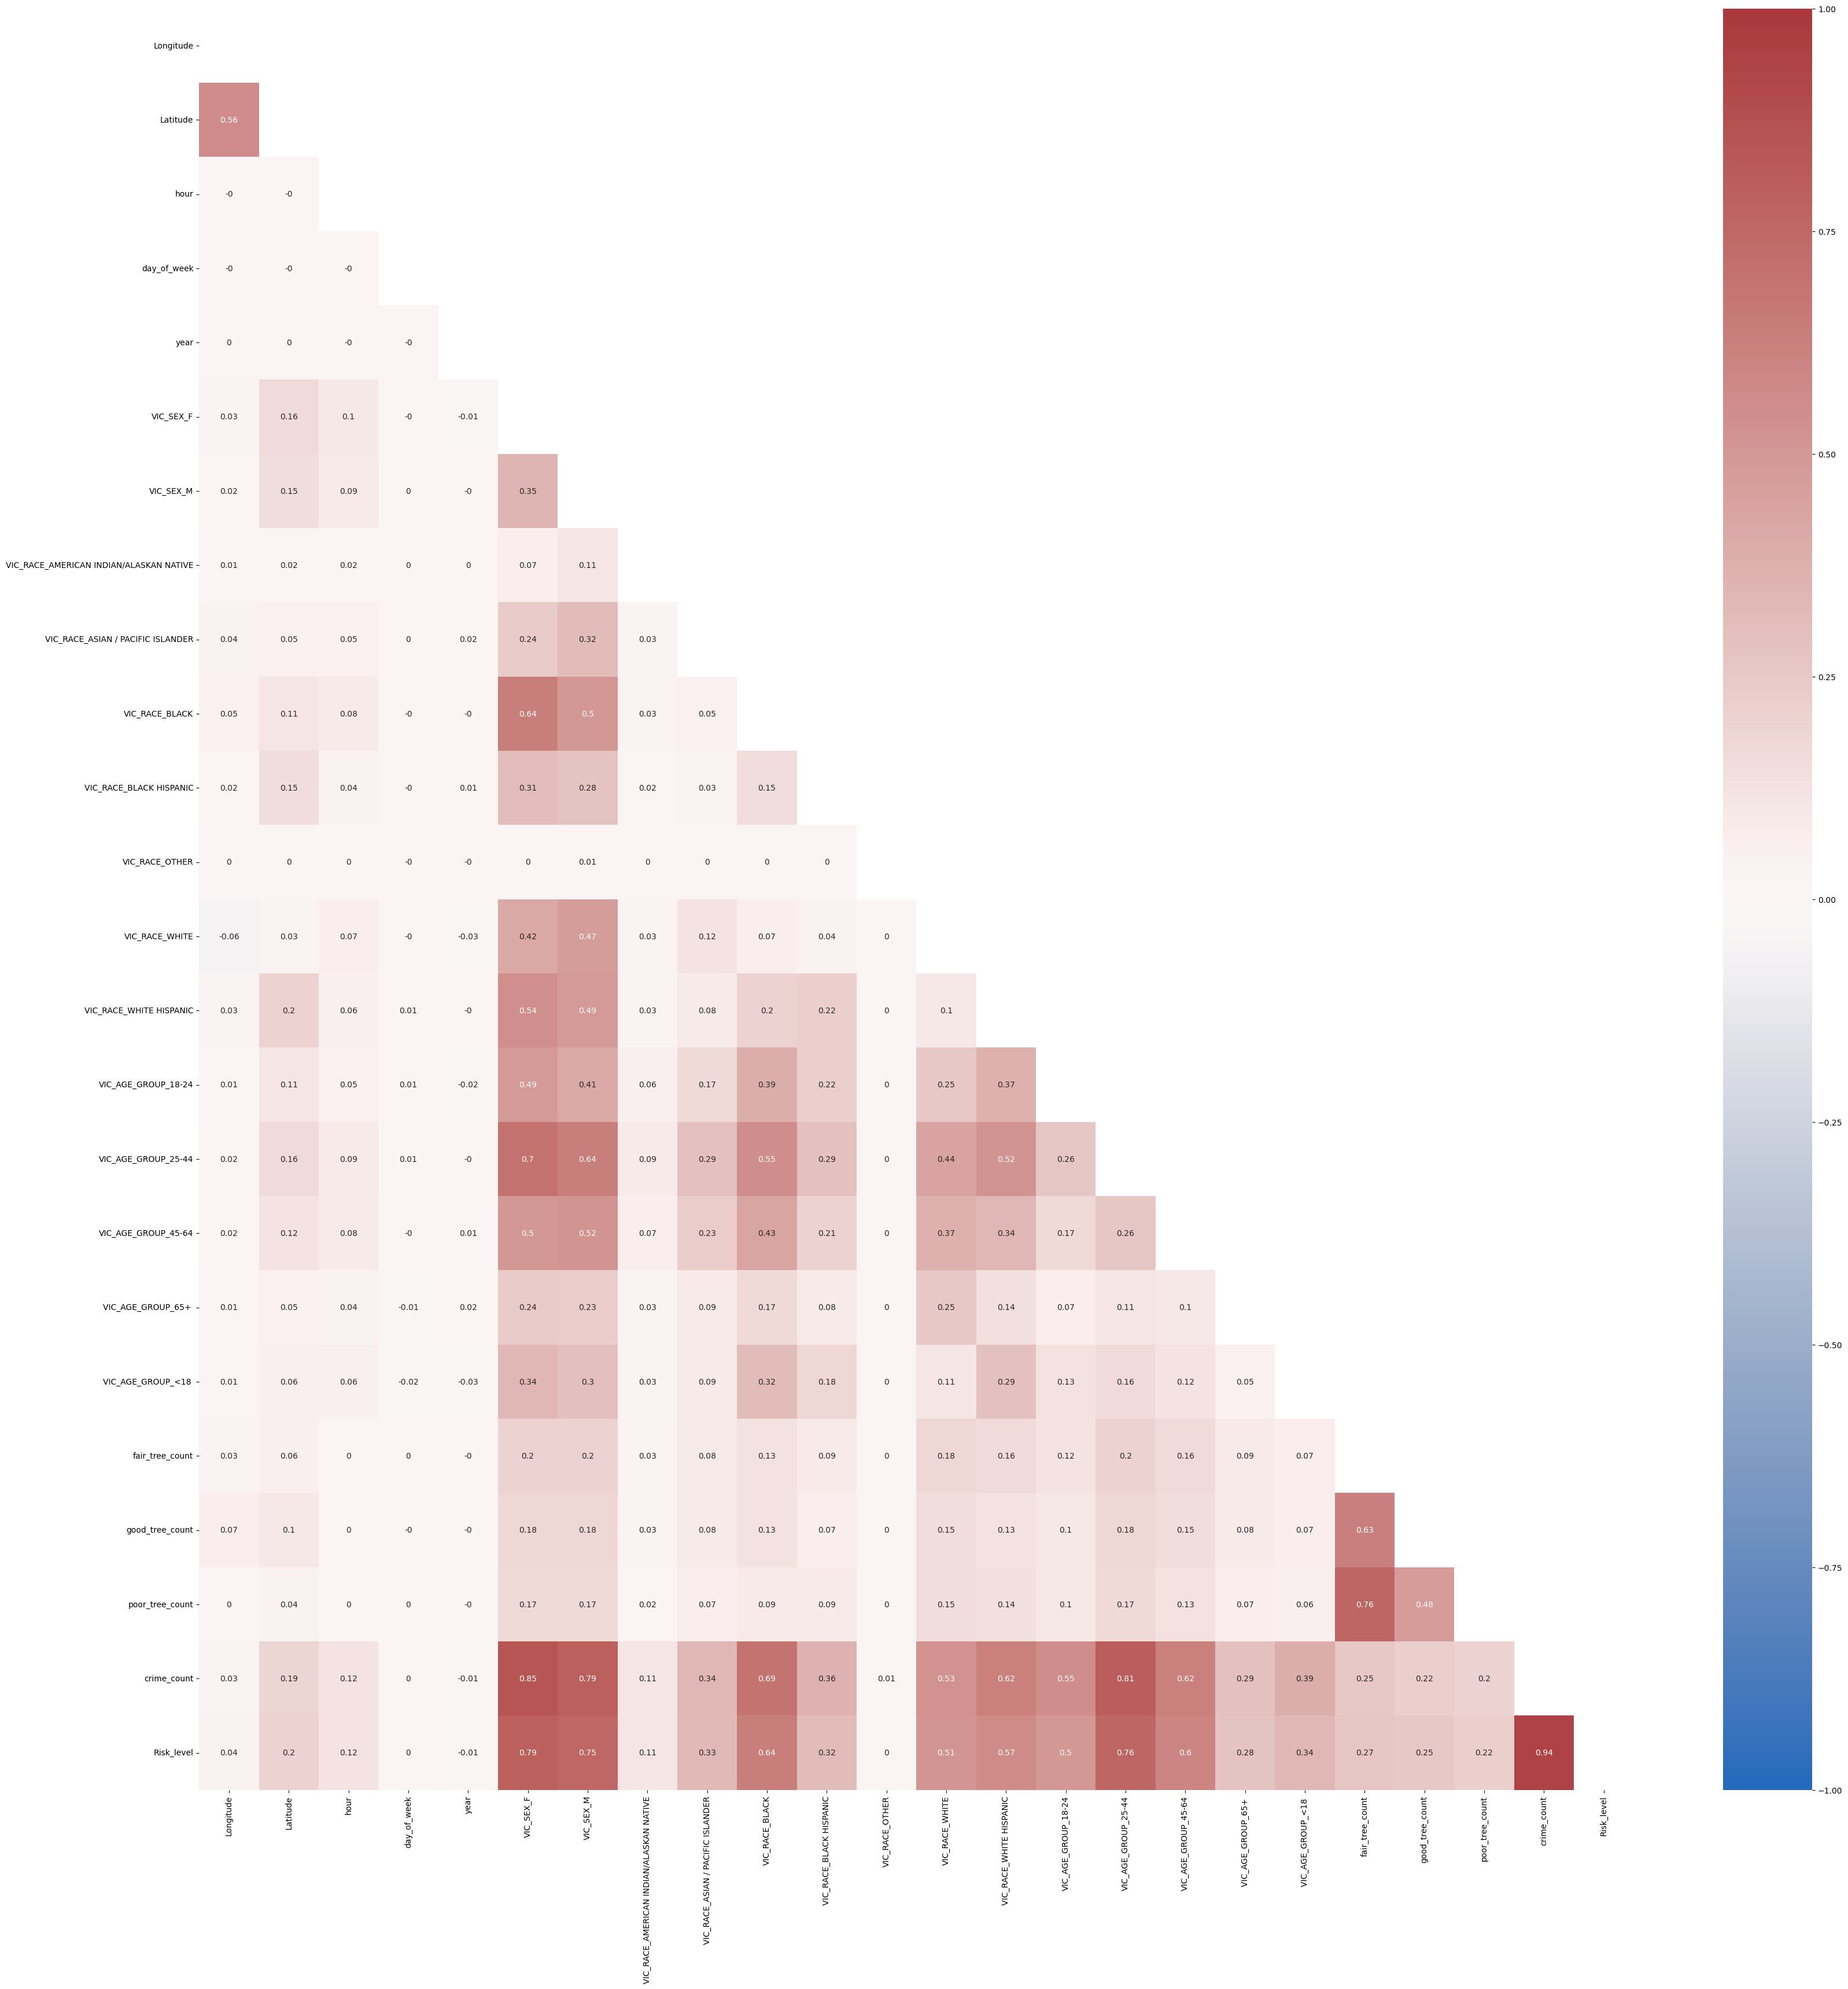

In [180]:
corr_matrix = matched_data.corr().round(2)
# print(corr_matrix)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(40,40))       
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask, ax=ax)
plt.show()

## Representation bias

In [181]:
import pickle

with open('merged_data.pickle', 'rb') as f:
    matched_data = pickle.load(f, encoding='binary')
matched_data

FileNotFoundError: [Errno 2] No such file or directory: 'merged_data.pickle'

In [ ]:
merged_data2010 = matched_data.loc[matched_data['year'] == 2010]

In [ ]:
merged_data2010

In [ ]:
total_male = merged_data2010['VIC_SEX_M'].sum()
total_female = merged_data2010['VIC_SEX_F'].sum()


In [ ]:
x = ['F', 'M']  # categories
y = [total_female, total_male]  # values
bin_edges = range(len(x) + 1)  # define bin edges

plt.bar(x, y)
plt.xticks(range(len(x)), x)
plt.xlabel('Sex of victims')
plt.ylabel('Number of victims')
plt.title('Sex distribution of victims')
plt.plot(range(len(x)), [167849, 151816], 'o--', c='red', linewidth=0, markersize=8, label='Expected sex distribution according to New York Census 2010')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
total_18 = merged_data2010.iloc[:, 17].sum()
total_24 = merged_data2010['VIC_AGE_GROUP_18-24'].sum()
total_44 = merged_data2010['VIC_AGE_GROUP_25-44'].sum()
total_64 = merged_data2010['VIC_AGE_GROUP_45-64'].sum()
total_65 = merged_data2010.iloc[:, 16].sum()

In [ ]:
x = ['<18', '18-24', '25-44', '45-64', '65+']
y = [total_18, total_24, total_44, total_64, total_65]

bin_edges = np.arange(len(x) + 1) - 0.5  # add a half bin width to shift the edges to the center of the bars
bin_edges = range(len(x) + 1)  # define bin edges

plt.bar(x, y)
plt.xticks(range(len(x)), x)
plt.xlabel('Age group of victims')
plt.ylabel('Number of victims')
plt.title('Age group distribution of victims')
plt.plot(range(len(x)), [69137, 33993, 99598, 78102, 38835], 'o--', c='red', linewidth=0, markersize=8, label='Expected age distribution according to New York Census 2010')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
white_hispanic = merged_data2010['VIC_RACE_WHITE HISPANIC'].sum()
black = merged_data2010['VIC_RACE_BLACK'].sum()
white = merged_data2010['VIC_RACE_WHITE'].sum()
black_hispanic = merged_data2010['VIC_RACE_BLACK HISPANIC'].sum()
asian_pacific = merged_data2010['VIC_RACE_ASIAN / PACIFIC ISLANDER'].sum()
american_alaskan = merged_data2010['VIC_RACE_AMERICAN INDIAN/ALASKAN NATIVE'].sum()
other = merged_data2010['VIC_RACE_OTHER'].sum()

In [ ]:
x = ['WH','B','W','BH','A/P','A/A', 'Other']
y = [white_hispanic, black, white, black_hispanic, asian_pacific, american_alaskan, other]

bin_edges = np.arange(len(x) + 1) - 0.5  # add a half bin width to shift the edges to the center of the bars
bin_edges = range(len(x) + 1)  # define bin edges

plt.bar(x, y)
plt.xticks(range(len(x)), x)
plt.xlabel('Race group of victims')
plt.ylabel('Number of victims')
plt.title('Race group distribution of victims')
plt.plot(range(len(x)), [45673 , 72781, 106471, 45673, 40311, 681 ,2262], 'o--', c='red', linewidth=0, markersize=8, label='Expected race distribution according to New York Census 2010')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Historical bias

In [ ]:
non_victim_male = 3882544 - merged_data2010['VIC_SEX_M'].sum()
non_victim_female = 4292589 - merged_data2010['VIC_SEX_F'].sum()

In [ ]:
import matplotlib.ticker as ticker

# Define the data and log scale it
victims = [total_male, total_female]
non_victims = [non_victim_male, non_victim_female]

labels = ['male', 'female']
colors = ['orange', 'blue']

# Create the stacked bar plot
x = np.arange(len(labels))
plt.bar(x, victims, color=colors[0], label='victims')
plt.bar(x, non_victims, bottom=victims, color=colors[1], label='non_victims')
plt.xticks(x, labels)
plt.ylabel('Value')
plt.title('Stacked Bar Plot with Two Numbers')
plt.legend()

# Set y-axis to log scale and adjust limits
plt.yscale('log')
plt.ylim([1, 10**7])

# Set y-axis tick labels to display original scale values

# Show the plot
plt.show()

In [ ]:
non_victim_male

In [ ]:
non_victim_18 = 1768111 - merged_data2010.iloc[:, 17].sum()
non_victim_24 = merged_data2010['VIC_AGE_GROUP_18-24'].sum()
non_victim_44 = merged_data2010['VIC_AGE_GROUP_25-44'].sum()
non_victim_64 = merged_data2010['VIC_AGE_GROUP_45-64'].sum()
non_victim_65 = merged_data2010.iloc[:, 16].sum()

# Predictive Analytics

In [182]:
trees_crimes_people_df = matched_data

In [183]:
# Slide the dataframe and move colums 4 and 5 to df Y. Keep the rest in df X
Y = trees_crimes_people_df.iloc[:, [23]]

X = trees_crimes_people_df.iloc[:,[0,1,2,3,4,19,20,21]]

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

## Baseline: Linear Regression Model

In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
print("MSE: ", mean_squared_error(Y_test, Y_pred))
print("MAE: ", mean_absolute_error(Y_test, Y_pred))
print("MAPE: ", mean_absolute_percentage_error(Y_test, Y_pred))

MSE:  0.6465217305393364
MAE:  0.593906606244068
MAPE:  1351172254464390.0


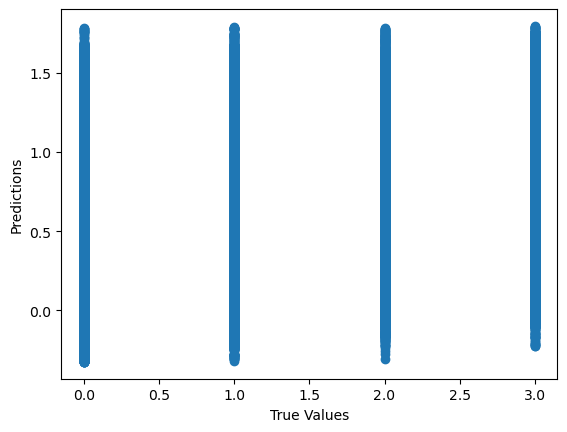

In [186]:
# plot the linear regression model using matplotlib
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()


## Baseline: Naive Bayes Classification

In [187]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score

gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)
print("Accuracy (Dropped categorical): ", accuracy_score(Y_test, Y_pred))
print("F1 (Dropped categorical): ", f1_score(Y_test, Y_pred, average='weighted'))

c:\Users\Kaninik Baradi\.conda\envs\geo_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy (Dropped categorical):  0.6730946270723859
F1 (Dropped categorical):  0.6202714884888946


## Initialise models for testing

In [188]:
from sklearn.linear_model import Perceptron, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# Convert Y_train and Y_test to 1D array
Y_train = Y_train.to_numpy().ravel()
Y_test = Y_test.to_numpy().ravel()

regressor_names = [
    "Lasso",
    "Elastic Net",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "K-Nearest Neighbours"
]

classifier_names = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Neural Net",
    "K-Nearest Neighbours"
]

regressors = [
    Lasso(alpha=0.1),
    ElasticNet(random_state=0),
    DecisionTreeRegressor(max_depth=5),
    RandomForestRegressor(max_depth=5, n_estimators=10, max_features=1),
    MLPRegressor(alpha=1, max_iter=1000),
    KNeighborsRegressor(3),
]

classifiers = [
    LogisticRegression(random_state=0),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    MLPClassifier(alpha=1, max_iter=1000),
    KNeighborsClassifier(3),
]

## Test different Classification models

In [189]:
categorical_technique_list = ["Just-One"]
X_train_list = [X_train]
X_test_list = [X_test]

accuracy_per_dataset_df = pandas.DataFrame(columns=["Dataset Name"].append(classifier_names))
balanced_accuracy_per_dataset_df = pandas.DataFrame(columns=["Dataset Name"].append(classifier_names))
f1_score_per_dataset_df = pandas.DataFrame(columns=["Dataset Name"].append(classifier_names))

for technique,X_train,X_test in zip(categorical_technique_list,X_train_list,X_test_list):
    print("[INFO] - Categorical technique: ", technique)
    accuracy_line = {"Dataset Name": technique}
    balanced_accuracy_line = {"Dataset Name": technique}
    f1_score_line = {"Dataset Name": technique}

    for classifier,method_name in zip(classifiers,classifier_names):
        print("[INFO] - Classifier: ", method_name)
        classifier.fit(X_train, Y_train)
        Y_pred = classifier.predict(X_test)
        accuracy_line[method_name] = accuracy_score(Y_test,Y_pred)
        balanced_accuracy_line[method_name] = balanced_accuracy_score(Y_test,Y_pred)
        f1_score_line[method_name] = f1_score(Y_test,Y_pred, average='weighted')

    accuracy_per_dataset_df = pandas.concat([accuracy_per_dataset_df, pandas.DataFrame(accuracy_line.values(), index=accuracy_line.keys()).T], ignore_index=True)
    balanced_accuracy_per_dataset_df = pandas.concat([balanced_accuracy_per_dataset_df, pandas.DataFrame(balanced_accuracy_line.values(), index=balanced_accuracy_line.keys()).T], ignore_index=True)
    f1_score_per_dataset_df = pandas.concat([f1_score_per_dataset_df, pandas.DataFrame(f1_score_line.values(), index=f1_score_line.keys()).T], ignore_index=True)

[INFO] - Categorical technique:  Just-One
[INFO] - Classifier:  Logistic Regression


c:\Users\Kaninik Baradi\.conda\envs\geo_env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[INFO] - Classifier:  Decision Tree
[INFO] - Classifier:  Random Forest
[INFO] - Classifier:  AdaBoost
[INFO] - Classifier:  Neural Net
[INFO] - Classifier:  K-Nearest Neighbours


In [190]:
# unpivot the dataframe
accuracy_per_dataset_df = accuracy_per_dataset_df.melt(id_vars=['Dataset Name'], var_name='Method', value_name='Accuracy')
accuracy_per_dataset_df

,Dataset Name,Method,Accuracy
0,Just-One,Logistic Regression,0.696867
1,Just-One,Decision Tree,0.703349
2,Just-One,Random Forest,0.703349
3,Just-One,AdaBoost,0.711853
4,Just-One,Neural Net,0.703349
5,Just-One,K-Nearest Neighbours,0.697499


In [191]:
# unpivot the dataframe
balanced_accuracy_per_dataset_df = balanced_accuracy_per_dataset_df.melt(id_vars=['Dataset Name'], var_name='Method', value_name='Balanced Accuracy')
balanced_accuracy_per_dataset_df

,Dataset Name,Method,Balanced Accuracy
0,Just-One,Logistic Regression,0.252466
1,Just-One,Decision Tree,0.25
2,Just-One,Random Forest,0.25
3,Just-One,AdaBoost,0.311697
4,Just-One,Neural Net,0.25
5,Just-One,K-Nearest Neighbours,0.387129


In [192]:
# unpivot the dataframe
f1_score_per_dataset_df = f1_score_per_dataset_df.melt(id_vars=['Dataset Name'], var_name='Method', value_name='F1 Score')
f1_score_per_dataset_df

,Dataset Name,Method,F1 Score
0,Just-One,Logistic Regression,0.583021
1,Just-One,Decision Tree,0.580855
2,Just-One,Random Forest,0.580855
3,Just-One,AdaBoost,0.623275
4,Just-One,Neural Net,0.580855
5,Just-One,K-Nearest Neighbours,0.666002


## Test different Regression models

In [193]:
categorical_technique_list = ["Just one"]
X_train_list = [X_train]
X_test_list = [X_test]

# Create a dictionary to store the dataframes of the results for each method
results_dict = {}

MSE_per_dataset_df = pd.DataFrame(columns=["Dataset Name"].append(names))
MAE_per_dataset_df = pd.DataFrame(columns=["Dataset Name"].append(names))
MAPE_per_dataset_df = pd.DataFrame(columns=["Dataset Name"].append(names))

for technique,X_train,X_test in zip(categorical_technique_list,X_train_list,X_test_list):
    print("[INFO] - Categorical technique: ", technique)
    MSE_line = {"Dataset Name": technique}
    MAE_line = {"Dataset Name": technique}
    MAPE_line = {"Dataset Name": technique}

    for regressor,method_name in zip(regressors,regressor_names):
        print("[INFO] - Regressor: ", method_name)
        regressor.fit(X_train, Y_train)
        Y_pred = regressor.predict(X_test)
        # create a dataframe with the Y_test and Y_pred
        Y_test_Y_pred_df = pd.DataFrame({'Y_test': Y_test, 'Y_pred': Y_pred})
        # append the dataframe to the dictionary
        results_dict[method_name] = Y_test_Y_pred_df
        # calculate the MSE, MAE and MAPE
        MSE_line[method_name] = mean_squared_error(Y_test, Y_pred)
        MAE_line[method_name] = mean_absolute_error(Y_test, Y_pred)
        MAPE_line[method_name] = mean_absolute_percentage_error(Y_test, Y_pred)


    # using pandas concat to append the new line to the dataframe
    MSE_per_dataset_df = pandas.concat([MSE_per_dataset_df, pd.DataFrame([MSE_line])], ignore_index=True)
    MAE_per_dataset_df = pandas.concat([MAE_per_dataset_df, pd.DataFrame([MAE_line])], ignore_index=True)
    MAPE_per_dataset_df = pandas.concat([MAPE_per_dataset_df, pd.DataFrame([MAPE_line])], ignore_index=True)


NameError: name 'pd' is not defined

In [ ]:
# unpivot the dataframe
MSE_per_dataset_df = MSE_per_dataset_df.melt(id_vars=['Dataset Name'], var_name='Method', value_name='MSE')
MSE_per_dataset_df

In [ ]:
MAE_per_dataset_df = MAE_per_dataset_df.melt(id_vars=['Dataset Name'], var_name='Method', value_name='MAE')
MAE_per_dataset_df

In [ ]:
MAPE_per_dataset_df

## Intrinsic Explainability

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

# define the model
model = KNeighborsRegressor(3)

# fit the model
model.fit(X_train, Y_train)

# perform permutation importance
results = permutation_importance(model, X_test, Y_test, scoring='neg_mean_squared_error')

# get importance
importance = results.importances_mean